# Machine Learning End to End Project

La empresa de tecnología financiera lanza allí una aplicación móvil. Esta aplicación se utiliza para fines financieros como préstamos bancarios, ahorros, etc. en un solo lugar. Tiene dos versiones gratuita y premium. La versión gratuita de la aplicación contiene funciones básicas y el cliente desea utilizar la función premium, por lo que debe pagar una cierta cantidad para desbloquearla.

El objetivo principal de la empresa es vender la aplicación en versión premium con un bajo coste publicitario, pero no saben cómo hacerlo. Esa es la razón por la que se les proporciona la función premium en la versión gratuita de la aplicación durante 24 horas para recopilar el comportamiento del cliente. Después de eso, la empresa contrató al ingeniero de aprendizaje automático para encontrar información a partir de los datos recopilados (comportamiento del cliente).

El trabajo del ingeniero de ML es encontrar o predecir nuevos clientes que estén interesados ​​en comprar el producto o no. Si los clientes comprarán un producto de todos modos, no es necesario hacer una oferta a ese cliente y perder el negocio. Ofrezca ofertas únicamente a aquellos clientes que estén interesados ​​en utilizar la versión premium de la aplicación pero que no puedan pagar su costo. Entonces la empresa hará ofertas a esos clientes y ganará más dinero.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [3]:
datatech = pd.read_csv('./Data/appData.csv')

In [99]:
datatech.shape

(50000, 12)

In [100]:
datatech

user               first_open  dayofweek       hour  age  \
0      235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1      333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2      254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3      234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4       51549  2013-02-26 18:50:48.661          1   18:00:00   31   
...       ...                      ...        ...        ...  ...   
49995  222774  2013-05-09 13:46:17.871          3   13:00:00   32   
49996  169179  2013-04-09 00:05:17.823          1   00:00:00   35   
49997  302367  2013-02-20 22:41:51.165          2   22:00:00   39   
49998  324905  2013-04-28 12:33:04.288          6   12:00:00   27   
49999   27047  2012-12-14 01:22:44.638          4   01:00:00   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                      Splash,Cycle,Loan           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled            enrolled_date  \
0             0                     0         0                      NaN   
1             0                     0         0                      NaN   
2             0                     1         0                      NaN   
3             0                     0         1  2013-07-05 16:11:49.513   
4             0                     0         1  2013-02-26 18:56:37.841   
...         ...                   ...       ...                      ...   
49995         0                     0         1  2013-05-09 13:47:52.875   
49996         0                     1         0                      NaN   
49997         0                     0         0                      NaN   
49998         0                     0         1  2013-04-28 12:35:38.709   
49999         0                     0         0                      NaN   

       liked  
0          0  
1          0  
2          1  
3          0  
4          1  
...      ...  
49995      0  
49996      0  
49997      0  
49998      0  
49999      1  

[50000 rows x 12 columns]

## Dataset

finetech DataFrame, hay datos de 50.000 usuarios con 12 funciones diferentes. Conozcamos brevemente todas y cada una de las características.

1. **user** : ID único para cada usuario.

2. **first_open** : Fecha (aa-mm-dd) y hora (Hora: Minuto: Segundos: Milisegundos) de inicio de sesión en la aplicación por primera vez.

3. **dayofweek** : en qué día inicia sesión el usuario.

        0: domingo
        1: lunes
        2: martes
        3: miércoles
        4: jueves
        5: viernes
        6: sábado

4. **Hour** : Hora del día en formato de 24 horas para el inicio de sesión del cliente. Está correlacionado con la columna del día de la semana .

5. **age** : La edad del usuario registrado.

6. **screen_list** : el nombre de varias pantallas vistas por los clientes, que están separadas por una coma.

7. **numscreens** : el número total de pantallas vistas por los clientes.

8. **minigame** : la aplicación contiene pequeños juegos relacionados con las finanzas. Si el cliente jugó un minijuego, entonces 1, en caso contrario, 0.

9. **used_premium_feature** : si el cliente utilizó la función premium de la aplicación, entonces 1, en caso contrario, 0.

10. **enrolled** : si el usuario compró una aplicación de función premium, entonces 1, en caso contrario, 0.

11. **inscribed_date** : en la fecha (aa-mm-dd) y hora (hora: minuto: segundos: milisegundos) en que el usuario compró una aplicación de funciones premium.

12. **liked** : cada pantalla de la aplicación tiene un botón Me gusta si al cliente le gusta, 1, en caso contrario 0.

In [101]:
datatech.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [102]:
datatech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


Todas las columnas tienen 50.000 valores no nulos excepto enrolled_date . Tiene 31.074 no nulos. Hay un total de 8 columnas que contienen valores enteros de 64 bits (int64) y las 4 restantes son de tipo objeto.

El tamaño de fineTech_appData DataFrame es de 4,6 MB.

Para saber cómo se distribuye la variable numérica, utilizamos el método DataFrame.describe() . Proporciona el recuento de números totales, el valor medio, la desviación estándar (desviación estándar) , el valor mínimo y máximo, y los valores están por debajo del 25%, 50%, 75% de cada columna.



In [103]:
datatech.describe()

user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000  
25%                0.000000      0.000000      0.000000  
50%                0.000000      1.000000      0.000000  
75%                0.000000      1.000000      0.000000  
max                1.000000      1.000000      1.000000

A partir del resultado anteior, podemos saber más sobre el conjunto de datos. La edad media del cliente es 31,72 años. Solo el 10,7% de los clientes jugó minijuegos y el 17,2% utilizó funciones premium de la aplicación, lo que le dio me gusta al 16,5%. El 62,1% de los clientes se inscribieron en la aplicación premium.

In [104]:
datatech.head()

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1

In [105]:
datatech['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                        Splash,Cycle,Loan
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                   Cycle,Splash,Home,RewardsContainer
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [106]:
"""# Ajustar la opción para que pandas muestre más caracteres en cada celda
pd.set_option('display.max_colwidth', None)  # None significa sin límite de longitud"""


"# Ajustar la opción para que pandas muestre más caracteres en cada celda\npd.set_option('display.max_colwidth', None)  # None significa sin límite de longitud"

In [107]:
for i in [1,2,3,4,5]:
    print(datatech.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [108]:
categorias = datatech.columns

In [109]:
categorias

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [110]:
for i in categorias:
     print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, datatech[i].unique(), len(datatech[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
........................

          
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
........................

          
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52 

En el resultado anterior, obtuvimos información sobre las columnas 'día de la semana' y 'hora'. El cliente registra la app todos los días de la semana y las 24 horas.

La columna 'hora' contiene el tipo de datos del objeto, por lo que la convertimos al formato de tipo de datos entero.

In [111]:
datatech['hour'] = datatech.hour.str.slice(1,3).astype(int)


In [112]:
datatech

user               first_open  dayofweek  hour  age  \
0      235136  2012-12-27 02:14:51.273          3     2   23   
1      333588  2012-12-02 01:16:00.905          6     1   24   
2      254414  2013-03-19 19:19:09.157          1    19   23   
3      234192  2013-07-05 16:08:46.354          4    16   28   
4       51549  2013-02-26 18:50:48.661          1    18   31   
...       ...                      ...        ...   ...  ...   
49995  222774  2013-05-09 13:46:17.871          3    13   32   
49996  169179  2013-04-09 00:05:17.823          1     0   35   
49997  302367  2013-02-20 22:41:51.165          2    22   39   
49998  324905  2013-04-28 12:33:04.288          6    12   27   
49999   27047  2012-12-14 01:22:44.638          4     1   25   

                                             screen_list  numscreens  \
0      idscreen,joinscreen,Cycle,product_review,ScanP...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                      Splash,Cycle,Loan           3   
3      product_review,Home,product_review,Loan3,Finan...          40   
4      idscreen,joinscreen,Cycle,Credit3Container,Sca...          32   
...                                                  ...         ...   
49995  Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...          13   
49996                 Cycle,Splash,Home,RewardsContainer           4   
49997  joinscreen,product_review,product_review2,Scan...          25   
49998  Cycle,Home,product_review,product_review,produ...          26   
49999  product_review,ScanPreview,VerifyDateOfBirth,V...          26   

       minigame  used_premium_feature  enrolled            enrolled_date  \
0             0                     0         0                      NaN   
1             0                     0         0                      NaN   
2             0                     1         0                      NaN   
3             0                     0         1  2013-07-05 16:11:49.513   
4             0                     0         1  2013-02-26 18:56:37.841   
...         ...                   ...       ...                      ...   
49995         0                     0         1  2013-05-09 13:47:52.875   
49996         0                     1         0                      NaN   
49997         0                     0         0                      NaN   
49998         0                     0         1  2013-04-28 12:35:38.709   
49999         0                     0         0                      NaN   

       liked  
0          0  
1          0  
2          1  
3          0  
4          1  
...      ...  
49995      0  
49996      0  
49997      0  
49998      0  
49999      1  

[50000 rows x 12 columns]

In [113]:
datatech.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

Para visualizar los datos necesitamos valores numéricos, para eso eliminamos algunas columnas en las que el tipo de datos es el objeto.

In [114]:
datatech2 = datatech.drop(['first_open','screen_list','enrolled_date'], axis=1)

In [115]:
datatech.head()

user               first_open  dayofweek  hour  age  \
0  235136  2012-12-27 02:14:51.273          3     2   23   
1  333588  2012-12-02 01:16:00.905          6     1   24   
2  254414  2013-03-19 19:19:09.157          1    19   23   
3  234192  2013-07-05 16:08:46.354          4    16   28   
4   51549  2013-02-26 18:50:48.661          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1

# Visualización de datos
## Mapa de calor usando la matriz de correlación
Heatmap utiliza para encontrar la correlación entre todas y cada una de las características utilizando la matriz de correlación.

Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData2')

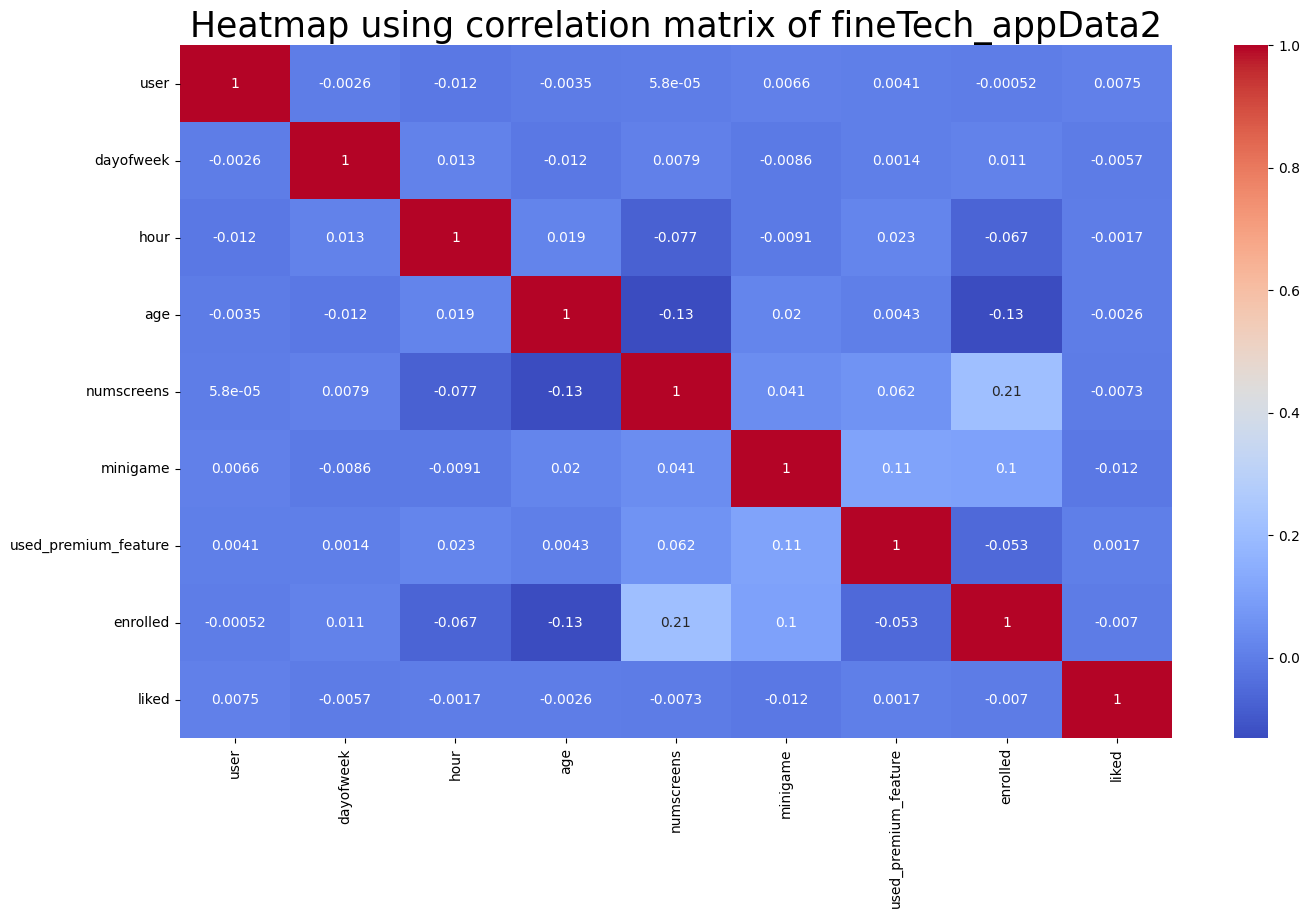

In [20]:
# Heatmap
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9
 
sns.heatmap(datatech2.corr(), annot = True, cmap ='coolwarm') # show heatmap
 
plt.title("Heatmap using correlation matrix of datatech_appData2", fontsize = 25) # title of heatmap


### Cmo podemos observar en el grafico no existe una fuerte correlación entre ninguna característica. 

Existe poca correlación entre 'numscreens' y 'enrolled' . Significa que esos clientes vieron más pantalla, que están usando la aplicación premium. 

Existe una ligera correlación entre 'minigame' con 'enrolled' y 'used_premium_feature'. 

La correlación ligeramente negativa entre 'edad' con 'inscritos' y 'numscreens' . Significa que los clientes mayores no usan la aplicación premium y no ven varias pantallas.

## Gráfico de pares de datatech2
El diagrama de pares ayuda a visualizar la distribución de datos y el diagrama de dispersión.

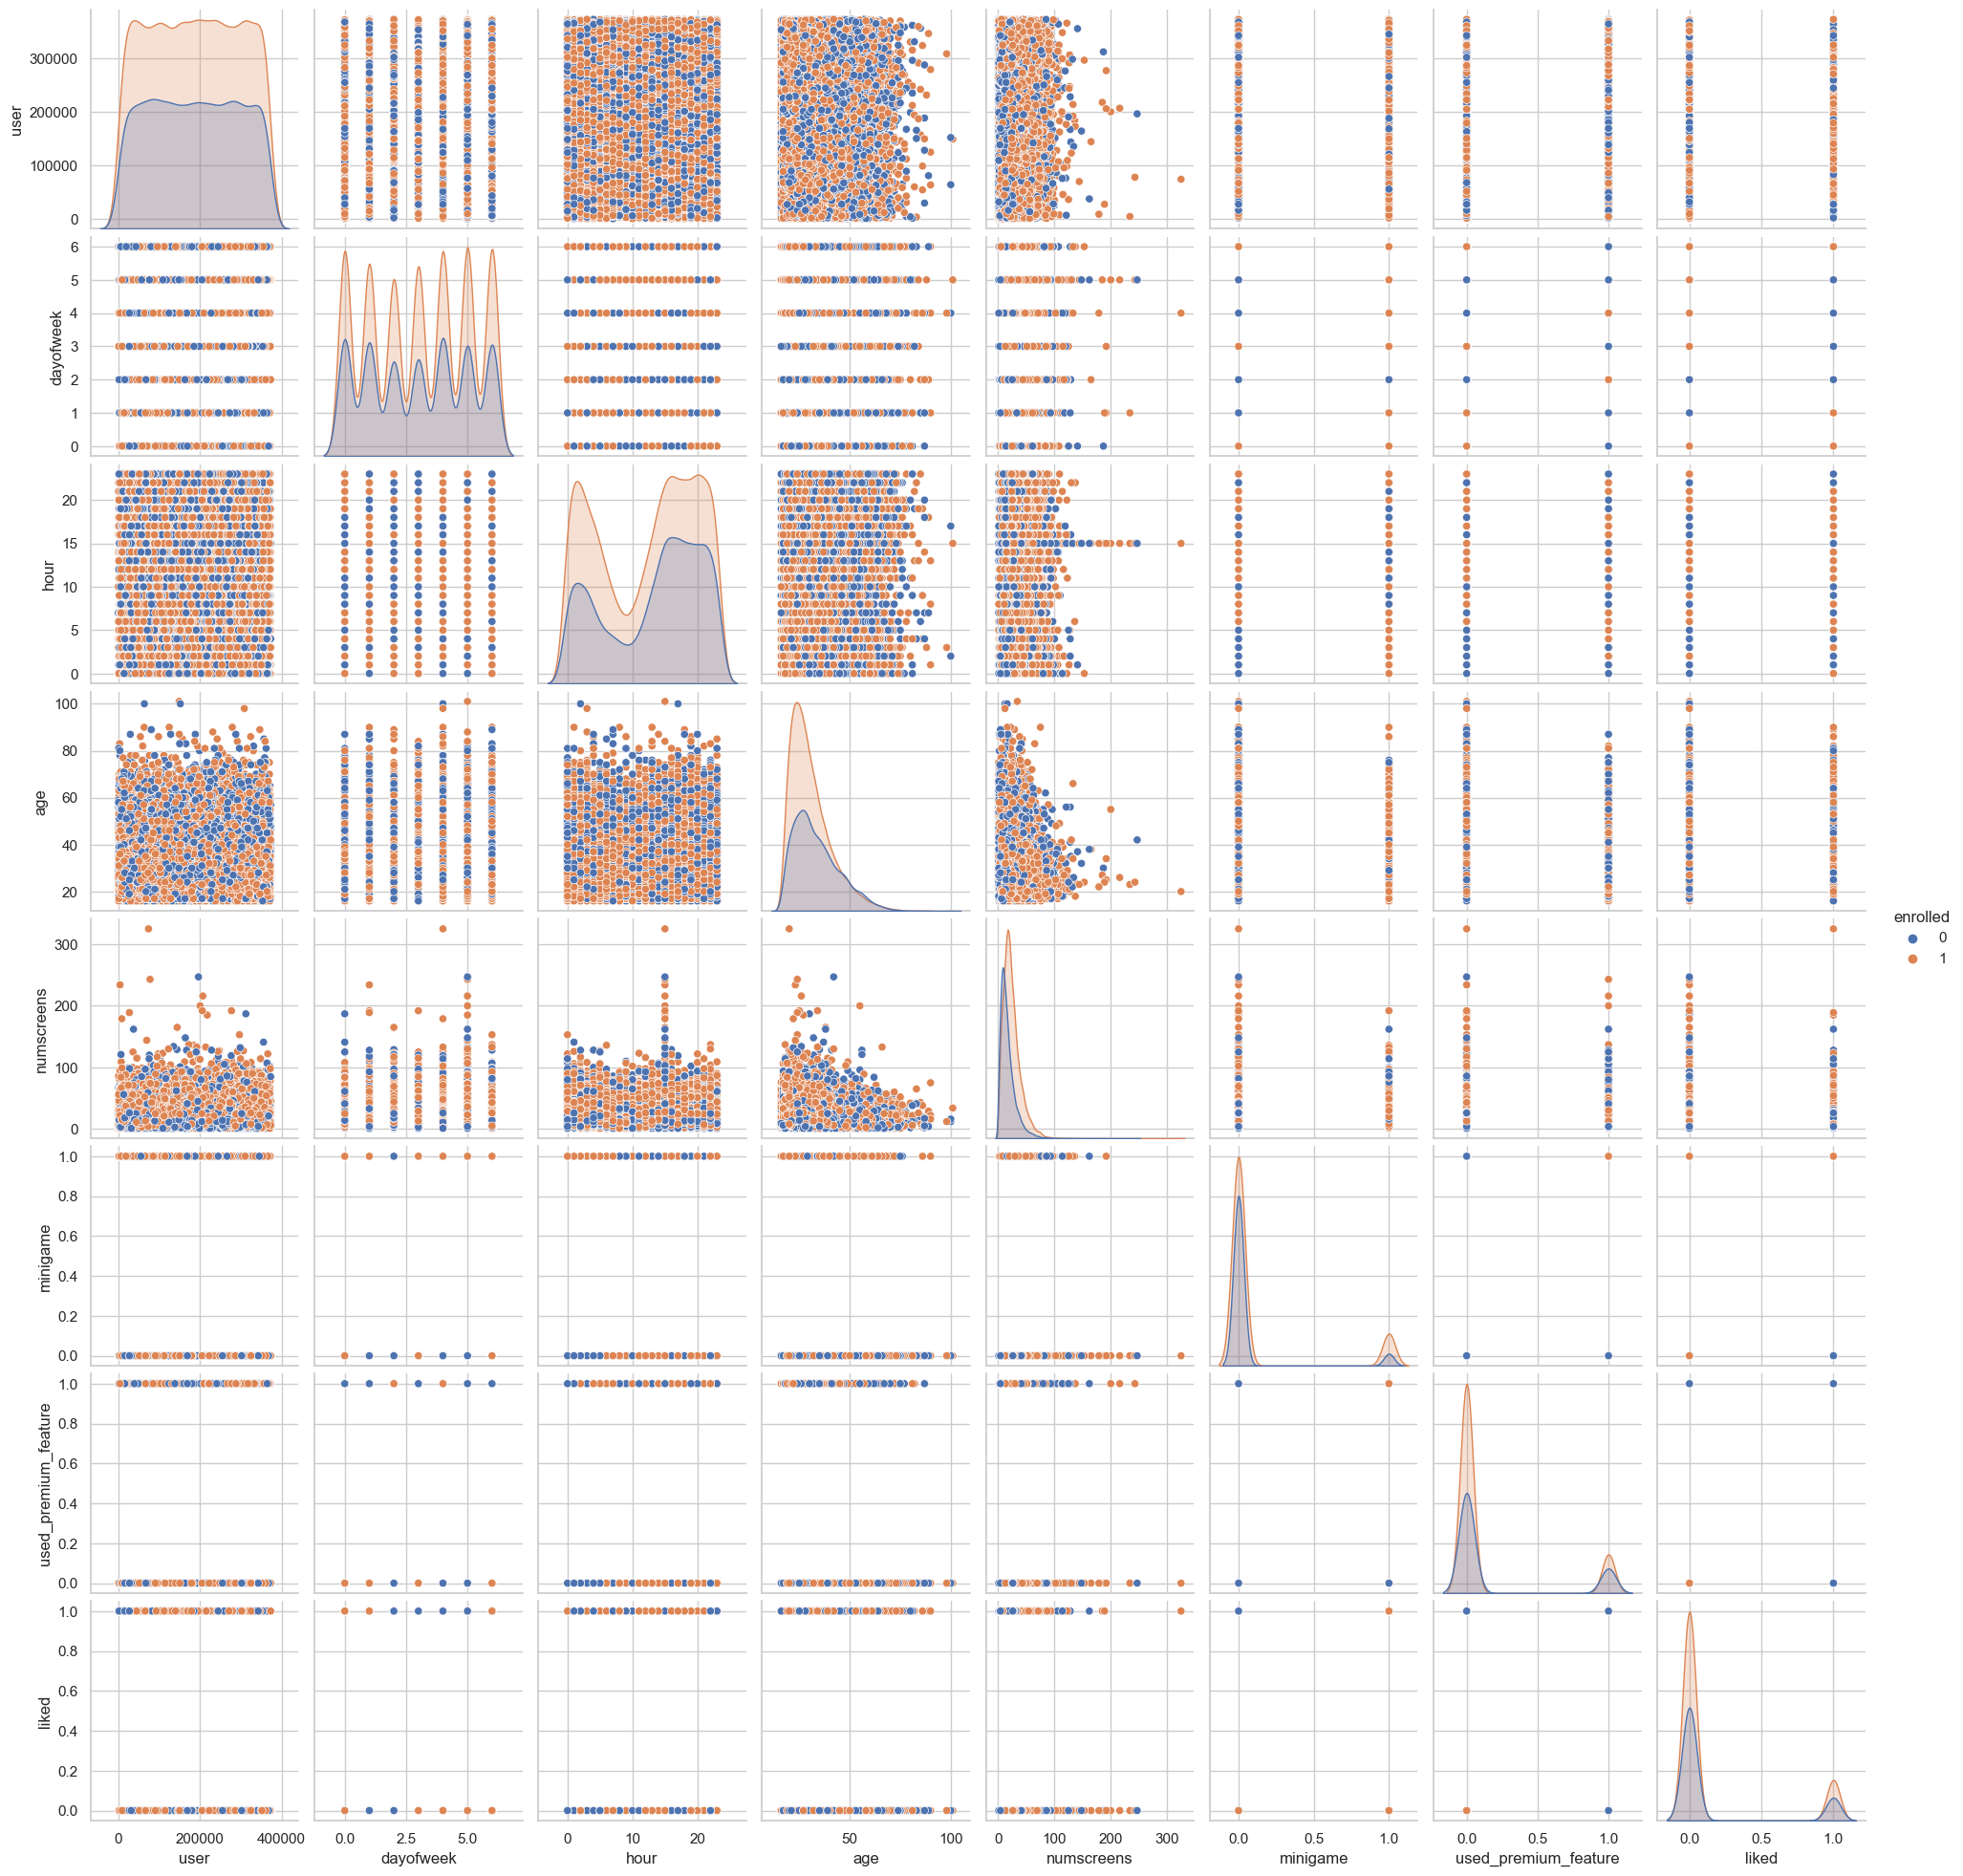

In [21]:
sns.set(style="whitegrid")
sns.pairplot(datatech2,hue='enrolled')

En el gráfico de pares que podemos ver, las características máximas tienen dos valores como 0 y 1 y los puntos naranjas muestran las características del cliente inscrito. Entonces visualizamos la trama contraria de los datos 'enrolled'

In [22]:
datatech2['enrolled'].value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

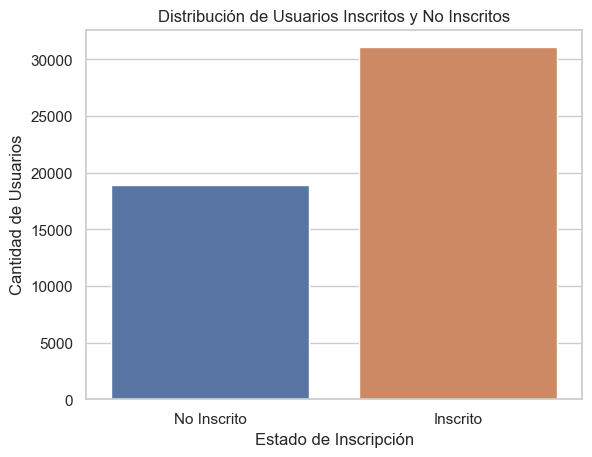

In [23]:
# Configuración del estilo visual
sns.set(style="whitegrid")

# Crear el gráfico de conteo directamente
sns.countplot(x=datatech.enrolled)
plt.title('Distribución de Usuarios Inscritos y No Inscritos')
plt.xlabel('Estado de Inscripción')
plt.ylabel('Cantidad de Usuarios')
plt.xticks([0, 1], ['No Inscrito', 'Inscrito'])  # Asumiendo que 0 es no inscrito y 1 es inscrito
plt.show()

Aquí se puede ver el valor exacto de los clientes inscritos y no inscritos.

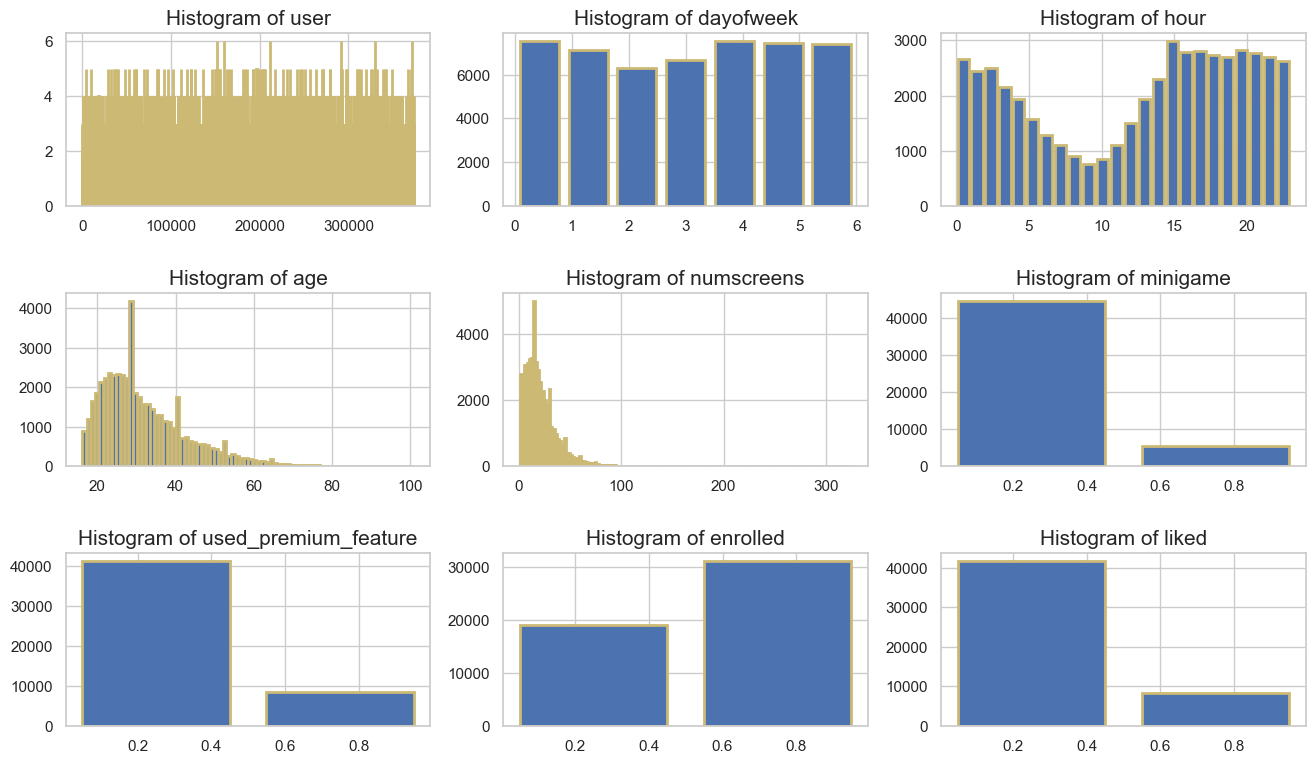

In [24]:
# plot histogram 
 
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = datatech2.columns # lista de los nombres de las columnas numericas seleccionadas para analizar
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # crear subplot histograma
    plt.title("Histogram of {}".format(j), fontsize = 15) # titulo del histograma
     
    bins = len(datatech2[j].unique()) # bins del histograma
    plt.hist(datatech2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histograma
     
plt.subplots_adjust(hspace=0.5) # espacio (subplots)

### Histogram of dayofweek:
   La distribución es uniforme, lo que sugiere que la actividad de inicio de sesión de los usuarios es consistente a lo largo de los días de la semana. Esto indica que no hay preferencia particular de un día sobre otro para el uso de la aplicación.

### Histogram of hour:
   Hay picos claros en las horas específicas del día, con mayor actividad alrededor de las horas de la mañana y la tarde. Esto podría indicar que los usuarios tienden a usar la aplicación antes y después del horario laboral típico.

### Histogram of age:
   La mayoría de los usuarios están en el rango de 20 a 40 años, con un pico alrededor de los 30 años. La distribución es asimétrica hacia la derecha, lo que indica una base de usuarios más joven.

### Histogram of numscreens:
   La mayoría de los usuarios interactúan con un número relativamente bajo de pantallas, con una caída rápida a medida que el número de pantallas aumenta. Esto sugiere que los usuarios tienden a usar funciones limitadas o específicas de la aplicación.

### Histogram of minigame:
La mayoría de los usuarios no juega minijuegos, lo que podría indicar que esta característica no es el principal atractivo de la aplicación o que no es conocida o accesible para muchos usuarios.

### Histogram of used_premium_feature:
   Una gran mayoría de los usuarios no ha usado características premium. Esto puede ser un indicativo de que las funciones premium necesitan ser más atractivas o que los usuarios necesitan más incentivos para probarlas.

### Histogram of enrolled:
   Un número significativo de usuarios está inscrito, aunque menos que los no inscritos. Esta variable es importante para entender qué tan efectivo es el embudo de conversión de la aplicación.

### Histogram of liked:
   Muy pocos usuarios han usado la función de 'Me gusta' en las pantallas de la aplicación. Esto podría indicar que la función no es intuitiva, no es útil, o simplemente no es usada frecuentemente por los usuarios.

## Diagrama de barras de correlación con la función 'enrolled'
Ahora estamos tratando de saber qué característica está fuertemente correlacionada con la característica 'inscrita' con positivo o negativo a través de un diagrama de barras.

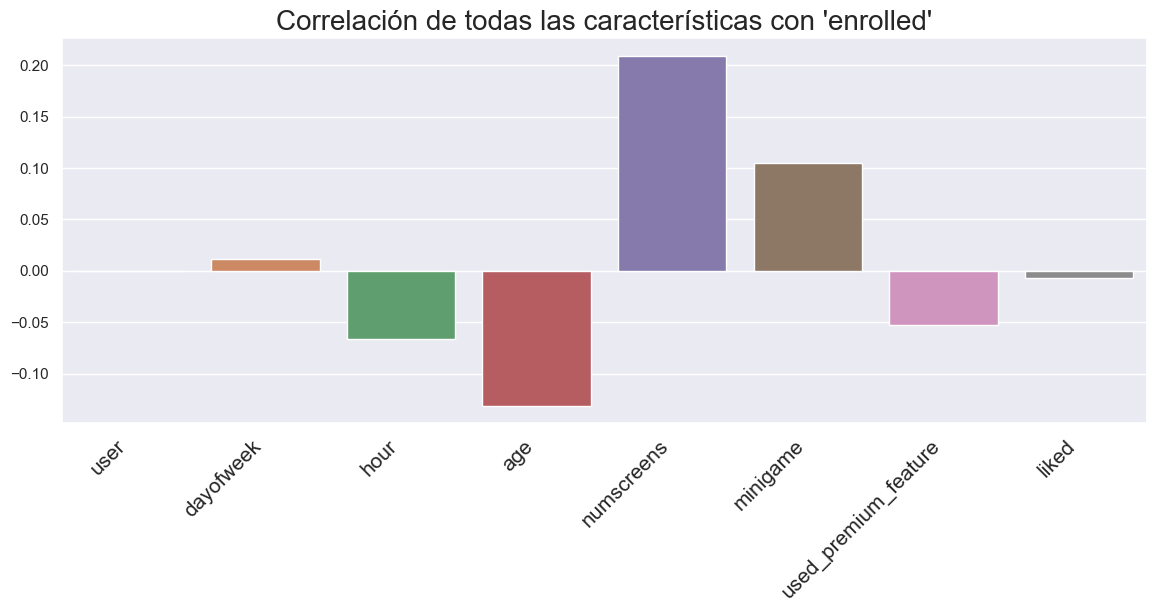

In [25]:
# Establecer estilo de fondo oscuro con cuadrícula
sns.set(style="darkgrid")

# Configurar el tamaño de la figura y el título del gráfico
plt.figure(figsize=(14, 5))
plt.title("Correlación de todas las características con 'enrolled'", fontsize=20)

# Eliminar 'enrolled' de las categorías para evitar autocorrelación
datatech3 = datatech2.drop(['enrolled'], axis=1)

# Calcular la correlación de las características restantes con 'enrolled'
correlations = datatech3.corrwith(datatech2['enrolled'])

# Crear el gráfico de barras de correlación
ax = sns.barplot(x=datatech3.columns, y=correlations)

# Configurar las etiquetas del eje x con rotación para mejor visualización
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=15)

plt.show()


## Características con Correlaciones Significativas

#### numscreens:
Correlación: Positiva moderada.

Observación: Esta característica tiene una fuerte correlación positiva con la inscripción, lo que sugiere que la mayor interacción con la aplicación incrementa la probabilidad de inscribirse en la versión premium. Potenciar la exploración de más pantallas mediante diseño intuitivo y gamificación podría aumentar las tasas de conversión.

#### used_premium_feature:
Correlación: Positiva y fuerte.

Observación: Los usuarios que utilizan características premium tienen una probabilidad mucho mayor de inscribirse. Esto implica que ofrecer pruebas gratuitas o demostraciones de estas características puede ser una estrategia efectiva para convertir a los usuarios en suscriptores pagos.

## Características con Correlaciones Débiles o Insignificantes

#### dayofweek, hour, liked:
Correlación: Débil y en su mayoría negativa.
Observación: Estas variables muestran poca o ninguna correlación con la inscripción, lo que indica que factores como el día de la semana, la hora del día, y si a los usuarios les gustó una pantalla o no, tienen poco impacto en su decisión de pagar por la versión premium. Centrarse en estas áreas puede no ser costo-efectivo en términos de aumentar las inscripciones.

#### age, minigame:
Correlación: Levemente positiva.
Observación: Aunque estas características tienen una correlación positiva, es relativamente baja. Sin embargo, podría valer la pena explorar más a fondo cómo los diferentes segmentos de edad y la participación en minijuegos influyen en las tasas de conversión para grupos demográficos específicos o en contextos de usuario particulares.

------
Ahora vamos a convertir las variables 'first_open' y 'enrolled_date' en formato datatime

In [116]:
# Convertir 'first_open' a datetime
datatech['first_open'] = pd.to_datetime(datatech['first_open'])

# Convertir 'enrolled_date' a datetime
datatech['enrolled_date'] = pd.to_datetime(datatech['enrolled_date'])

# Verificar los tipos de datos para asegurar que las conversiones fueron exitosas
print(datatech.dtypes)


user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object



vamos a sumar una nueva columna llamada 'time_to_enrolled' el cual nos dira el tiempo que el cliente tarda en inscribirse en funciones premium desde su registro. Para esto vamos a restar :

In [117]:
datatech['time_to_enrolled']  = (datatech.enrolled_date - datatech.first_open).astype('timedelta64[h]')


In [118]:
datatech['time_to_enrolled']

0        NaN
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Name: time_to_enrolled, Length: 50000, dtype: float64

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

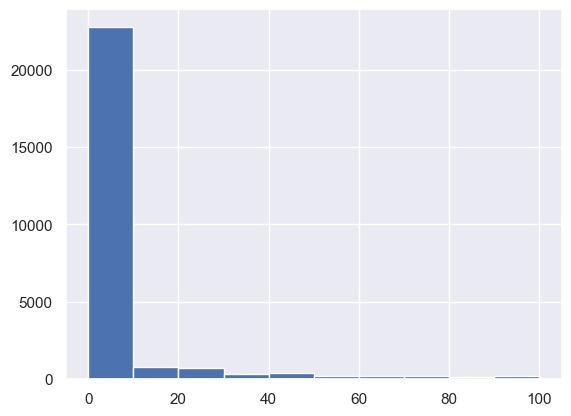

In [119]:
# Plot histogram
plt.hist(datatech['time_to_enrolled'].dropna(), range = (0,100))

En el histograma anterior, observamos el número máximo de clientes que han inscrito la aplicación en 10 horas desde el registro.

### Selección de características
Consideramos que aquellos clientes que se hayan registrado después de 48 horas son 0.

In [120]:
datatech.loc[datatech['time_to_enrolled'] > 48, 'time_to_enrolled'] = 0

Vamos a eliminar algunas variables 'time_to_enrolled', 'enrolled_date', 'first_open' que no estan fuertemente correlacionadas con el resultado.

In [121]:
datatech.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [122]:
datatech.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

Leemos otro csv que vamos a necesitar, este es un csv que contiene en las filas las columnas que vamos a agregar, procedemos

In [123]:
datatech_screen = pd.read_csv("top_screens.csv").top_screens.values
 

In [124]:
datatech_screen

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

Agregamos en nuestro dataset finetech ',' al final de cada cadena de 'screen_list' para realizar mas operaciones

In [125]:
datatech['screen_list'] = datatech.screen_list.astype(str) + ','

In [126]:
datatech.head()

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                 Splash,Cycle,Loan,           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled  liked  
0                     0         0      0  
1                     0         0      0  
2                     1         0      1  
3                     0         1      0  
4                     0         1      1

revisamos nuevamente para confirmar:

In [127]:
for i in [1,2,3,4,5]:
    print(datatech.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2, 

Splash,Cycle,Loan, 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2, 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review, 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3, 



'Screen_list' contiene valores de cadena pero no podemos usarlo directamente. 
Entonces, para resolver este problema, tomamos cada nombre de pantalla de 'finetech_screen' y lo agregamos como una columna con el mismo nombre a 'finetech' . 

In [128]:
datatech['screen_list'] = datatech['screen_list'].astype(str)
# Iterar sobre cada nombre de pantalla en datatech_screen
for screen_name in datatech_screen:
    # Crear una columna para cada nombre de pantalla
    # El .str.contains() comprobará si cada pantalla está contenida en 'screen_list'
    datatech[screen_name] = datatech['screen_list'].str.contains(screen_name).astype(int)

# Opcional: Si deseas eliminar la columna 'screen_list' después de procesar, puedes descomentar la siguiente línea
# del datatech['screen_list']


In [129]:
datatech.shape

(50000, 68)

Podemos observar que la forma del conjunto de datos ha cambiado de 12 a 68 columnas.

In [130]:
datatech.head()

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                 Splash,Cycle,Loan,           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled  liked  ...  ProfileJobTitle  Login  \
0                     0         0      0  ...                0      1   
1                     0         0      0  ...                0      0   
2                     1         0      1  ...                0      0   
3                     0         1      0  ...                0      0   
4                     0         1      1  ...                0      0   

   ProfileEmploymentLength  WebView  SecurityModal  Loan4  ResendToken  \
0                        0        0              0      0            0   
1                        0        0              0      0            0   
2                        0        0              0      0            0   
3                        0        0              0      0            0   
4                        0        0              0      0            0   

   TransactionList  NetworkFailure  ListPicker  
0                0               0           0  
1                0               0           0  
2                0               0           0  
3                0               0           0  
4                0               0           0  

[5 rows x 68 columns]

In [145]:
datatech.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked', 'location',
       'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Splash',
       'RewardsContainer', 'EditProfile', 'Finances', 'Alerts', 'Leaderboard',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Savings', 'Credits',
       'CreditCategories', 'Loans'],
      dtype='object')

## Procesamiento de la Columna 'screen_list'
En esta sección, vamos a procesar la columna 'screen_list' del dataset, cada entrada en 'screen_list' contiene una lista de pantallas separadas por comas.
Nuestro objetivo es contar el número de pantallas en cada lista y almacenar este conteo en una nueva columna llamada 'remain_screen_list', después de contar las pantallas, eliminamos la columna original 'screen_list' ya que no la necesitaremos más.


In [150]:
# Mostrar la primera entrada de 'screen_list' para verificar el contenido
datatech.loc[1,'screen_list']

'joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2,'

In [152]:
# Contar el número de pantallas restantes en 'screen_list' y almacenar el resultado en 'remain_screen_list'
datatech['remain_screen_list'] = datatech['screen_list'].str.count(",") + 1

# Eliminar la columna 'screen_list'
datatech.drop(columns=['screen_list'], inplace=True)


KeyError: 'screen_list'

In [154]:
datatech['remain_screen_list']

0        14
1        12
2         4
3        18
4        20
         ..
49995    12
49996     5
49997    11
49998    20
49999    20
Name: remain_screen_list, Length: 50000, dtype: int64

### **Reducir y combinar** 
las columnas relacionadas con ahorros (savings), créditos (credits), categorías de crédito (CC1, CC1Category, CC3) y préstamos (loans) puede simplificar el análisis de datos y mejorar la eficiencia del modelo de machine learning. 

#### Ahorros (Savings):

- Por qué reducir: Las múltiples columnas de ahorros (Saving1, Saving2, etc.) pueden generar redundancia y complejidad sin aportar valor significativo si se analizan por separado.
- Cómo reducir: Combinar todas las columnas de ahorros en una sola columna Savings que refleje el total de interacciones o una medida agregada de ahorros.
- Beneficio: Esto simplifica la información a una sola métrica que es más fácil de analizar y modelar.

#### Créditos (Credits):

- Por qué reducir: Varias columnas de crédito (Credit1, Credit2, Credit3, etc.) pueden solaparse en términos de la información que proporcionan.
- Cómo reducir: Unirlas en una columna Credits que sume todas las interacciones relacionadas con el crédito.
- Beneficio: La agregación proporciona una vista consolidada de las interacciones de crédito, facilitando el análisis.

#### Categorías de crédito (CC1, CC1Category, CC3):

- Por qué reducir: Las categorías y detalles de crédito (CC1, CC1Category, CC3) pueden estar representando aspectos similares del comportamiento de crédito.
- Cómo reducir: Integrarlas en una sola columna CreditCategories que sume estas interacciones.
- Beneficio: Reducción de columnas y simplificación del análisis de categorías de crédito.

#### Préstamos (Loans):

- Por qué reducir: Múltiples columnas de préstamos (Loan, Loan2, Loan3, etc.) pueden complicar el modelo sin añadir valor individualmente.
- Cómo reducir: Combinarlas en una columna Loans que refleje el número total de interacciones de los préstamos.
- Beneficio: Una métrica consolidada facilita la interpretación del comportamiento del usuario respecto a los préstamos.

In [132]:
# Combinar columnas de ahorros
saving_columns = ['Saving1', 'Saving2', 'Saving4', 'Saving5', 'Saving6', 'Saving7', 'Saving8', 'Saving9', 'Saving10','Saving2Amount']
datatech['Savings'] = datatech[saving_columns].sum(axis=1)
datatech.drop(columns=saving_columns, inplace=True)

In [133]:
# Combinar columnas de créditos
credit_columns = ['Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard']
datatech['Credits'] = datatech[credit_columns].sum(axis=1)
datatech.drop(columns=credit_columns, inplace=True)

In [134]:
# Combinar columnas de categorías de crédito
cc_columns = ['CC1', 'CC1Category', 'CC3']
datatech['CreditCategories'] = datatech[cc_columns].sum(axis=1)
datatech.drop(columns=cc_columns, inplace=True)

In [135]:
# Combinar columnas de préstamos
loan_columns = ['Loan', 'Loan2', 'Loan3', 'Loan4']
datatech['Loans'] = datatech[loan_columns].sum(axis=1)
datatech.drop(columns=loan_columns, inplace=True)

In [136]:
datatech.shape

(50000, 50)

In [155]:
datatech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

Después de haber resumido las variables relacionadas con ahorros, créditos, categorías de crédito y préstamos, nos quedaron 51 columnas en lugar de 68, simplificando así el análisis y mejorando la eficiencia del modelo.


## Mapa de calor de correlación para todas las variables del dataset.
Este mapa de calor nos permite visualizar las relaciones y dependencias entre las variables,
identificando cuáles están altamente correlacionadas. Esto es útil para:
1. Detectar colinealidad entre variables, lo cual puede afectar la interpretación del modelo.
2. Seleccionar características importantes eliminando aquellas con alta correlación que no aporten nueva información.
3. Obtener una mejor comprensión de la estructura de los datos y las interacciones entre las diferentes características.


C:\Users\Ismalia Gonzalez\AppData\Local\Temp\ipykernel_17648\3131800438.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = finetech.corr()


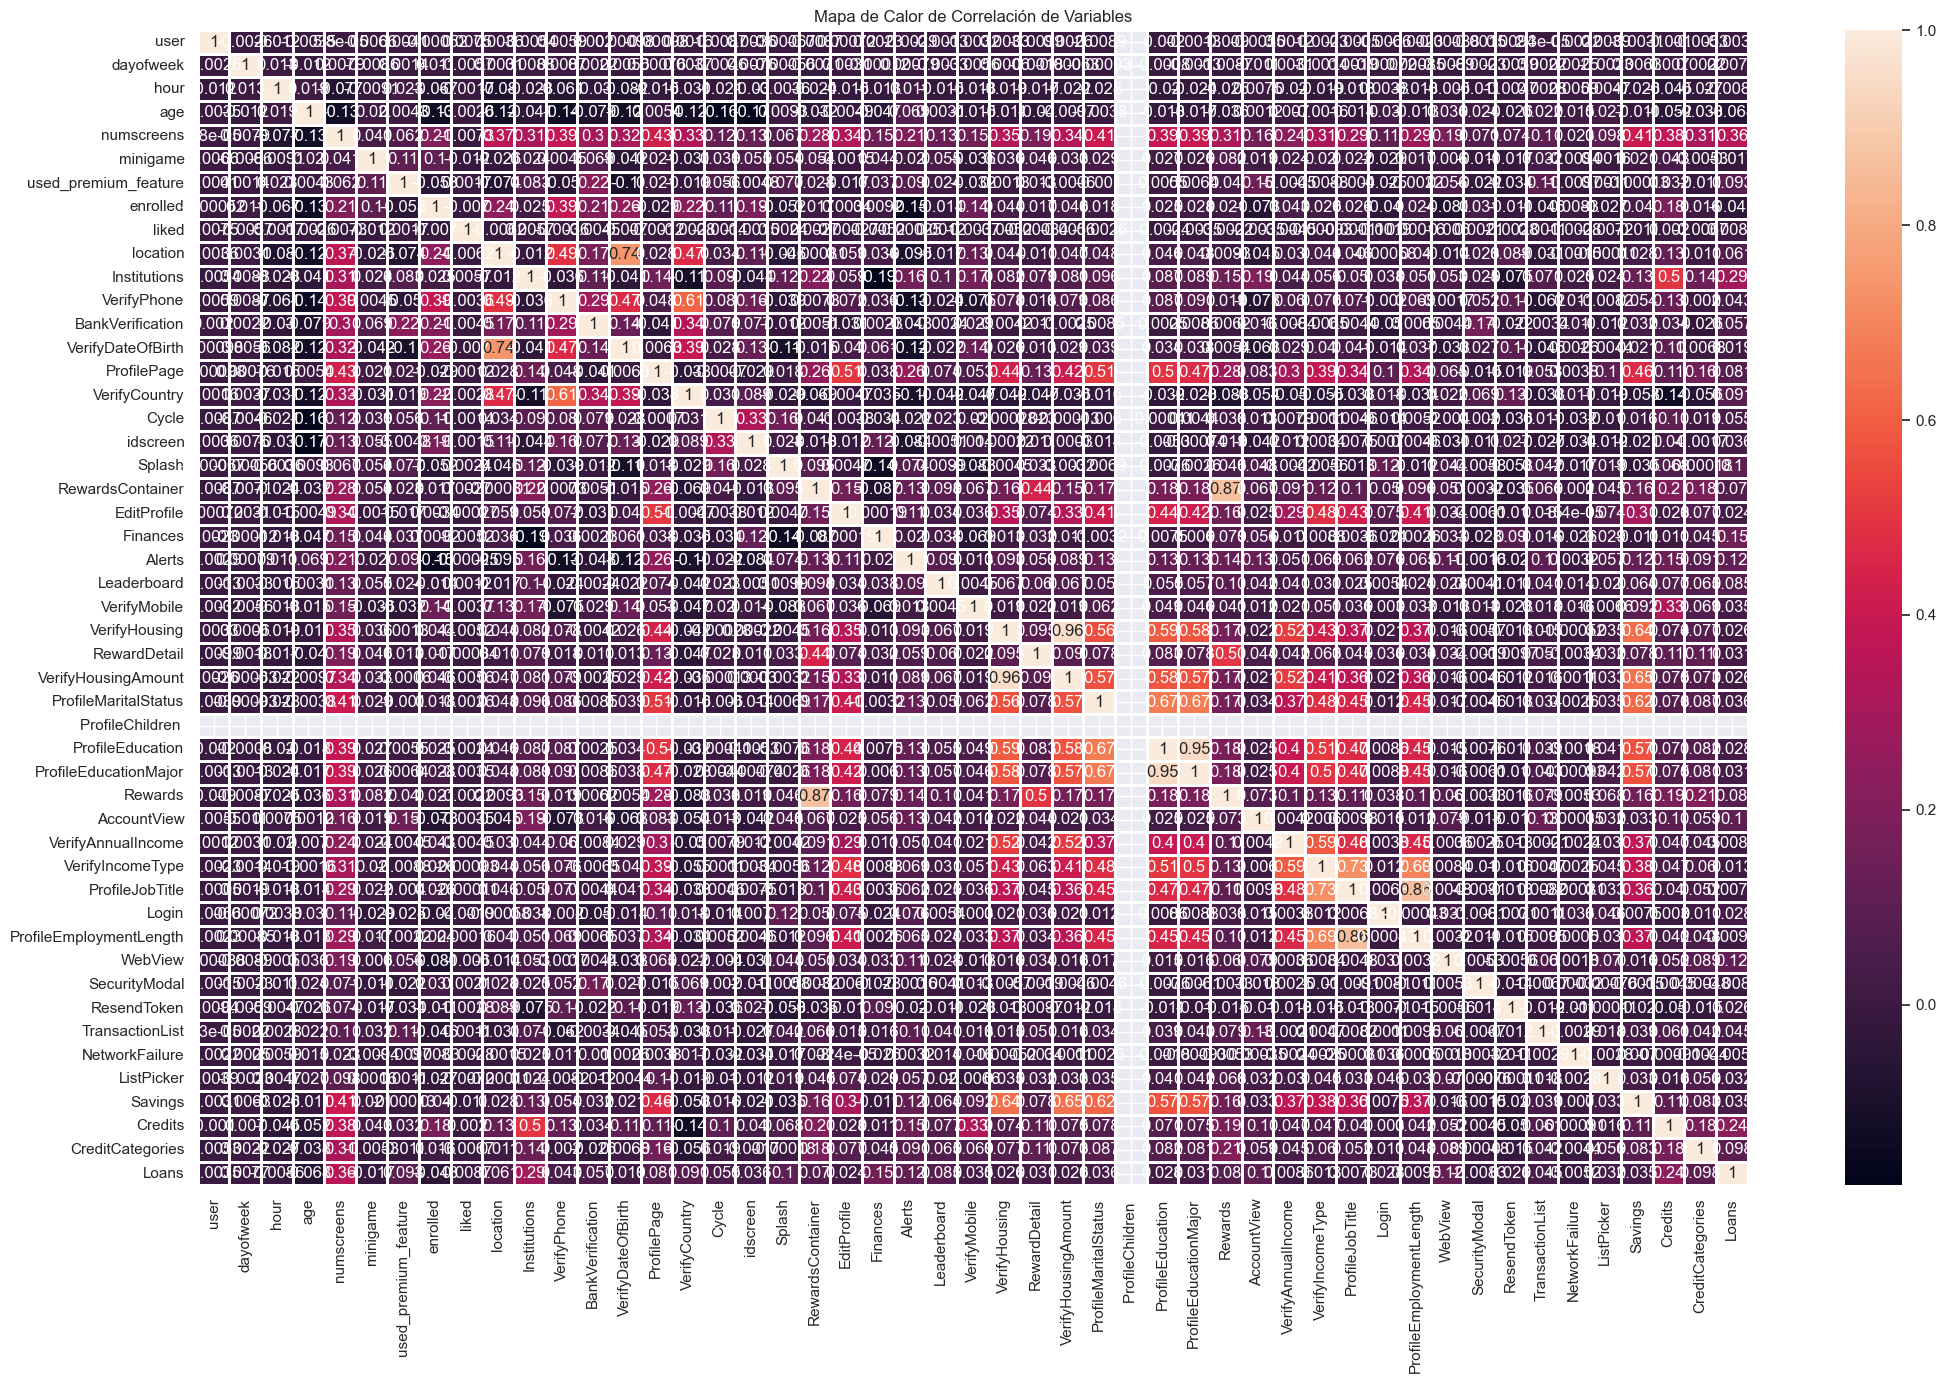

In [137]:
# Calcular la matriz de correlación
correlation_matrix = datatech.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(25, 15))

# Generar el mapa de calor usando seaborn
sns.heatmap(correlation_matrix, annot=True,  linewidths=2)

# Título del mapa de calor
plt.title('Mapa de Calor de Correlación de Variables')

# Mostrar el mapa de calor
plt.show()

# Preprocesamiento de Datos
En esta sección, vamos a preparar nuestros datos para el modelo de machine learning.
Esto incluye la división del dataset en conjuntos de entrenamiento (train) y prueba (test), la división nos permite entrenar el modelo con un subconjunto de los datos y luego evaluar su desempeño con datos no vistos, esta práctica es importante para asegurar que el modelo generaliza bien y no se ajusta demasiado a los datos de entrenamiento.


In [156]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = datatech.drop(columns=['enrolled'])
y = datatech['enrolled']

# Dividir el dataset en conjuntos de entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos resultantes para verificar la división
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (40000, 49)
X_test shape: (10000, 49)
y_train shape: (40000,)
y_test shape: (10000,)


## Escalado de Características
En esta sección, vamos a escalar nuestras características utilizando StandardScaler.
El escalado de características es importante porque muchos algoritmos de machine learning
funcionan mejor cuando las características tienen una escala similar.
StandardScaler estandariza las características eliminando la media y escalando a varianza unitaria,esto asegura que cada característica contribuya de manera equitativa al modelo.


In [157]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador solo en el conjunto de entrenamiento y transformar ambos conjuntos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Desarrollo del Modelo
En esta sección, vamos a desarrollar un modelo de machine learning para predecir si un usuario se inscribirá (enrolled), Usaremos Logistic Regression, un modelo adecuado para problemas de clasificación binaria, Evaluaremos el rendimiento del modelo usando métricas como precisión, recall, F1-score y la matriz de confusión.


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Entrenar el modelo de Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7514
Confusion Matrix:
[[2421 1442]
 [1044 5093]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.63      0.66      3863
           1       0.78      0.83      0.80      6137

    accuracy                           0.75     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000



### Implementar técnicas de balanceo de clases y probar un modelo alternativo como Random Forest

In [160]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Balancear las clases usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Hiperparámetros para la búsqueda en la cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda en la cuadrícula con validación cruzada
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Mejor modelo encontrado
best_rf_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)


Random Forest Accuracy: 0.7761
Random Forest Confusion Matrix:
[[2747 1116]
 [1123 5014]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      3863
           1       0.82      0.82      0.82      6137

    accuracy                           0.78     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.78      0.78      0.78     10000



In [161]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenar un modelo de XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Hiperparámetros para la búsqueda en la cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Realizar la búsqueda en la cuadrícula con validación cruzada
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Mejor modelo encontrado
best_xgb_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)
print("XGBoost Classification Report:")
print(class_report_xgb)

XGBoost Accuracy: 0.778
XGBoost Confusion Matrix:
[[2727 1136]
 [1084 5053]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      3863
           1       0.82      0.82      0.82      6137

    accuracy                           0.78     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.78      0.78      0.78     10000



In [179]:
# Imprimir los mejores hiperparámetros
print(f"Best hyperparameters: {grid_search.best_estimator_}")

Best hyperparameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


## Precisión:

Los modelos de Random Forest y XGBoost han mostrado una precisión similar (0.7761 y 0.778 respectivamente), ambos superando al modelo de Logistic Regression (0.7514).

## Balance de Clases:

Tanto Random Forest como XGBoost han proporcionado mejores métricas de recall y f1-score para ambas clases (0 y 1) en comparación con Logistic Regression, lo que indica una mejor capacidad para identificar correctamente ambas clases.

## Rendimiento General:

#### Logistic Regression:
Si bien es más simple y rápido de entrenar, tiene una precisión y recall menores comparado con los otros modelos.
#### Random Forest: 
Proporciona un buen equilibrio entre precisión y recall, siendo robusto y relativamente fácil de ajustar.
#### XGBoost: 
Ofrece el mejor rendimiento general en términos de precisión y recall, aunque puede ser más complejo y lento de entrenar y ajustar.

## Recomendaciones
#### Uso de XGBoost: 
Dado su rendimiento superior, XGBoost es la mejor opción si se busca maximizar la precisión y la capacidad de generalización del modelo, siempre y cuando los recursos computacionales lo permitan y como  brindan mejor precisión que otros algoritmos de ML, en este caso, continuaremos con el clasificador XGBoost porque la precisión es ligeramente mayor.

#### Random Forest como Alternativa: 
Si se buscan tiempos de entrenamiento más rápidos y menor complejidad, Random Forest es una excelente alternativa que aún ofrece un buen rendimiento.
#### Logistic Regression: 
Puede ser útil como un modelo base o cuando se necesita una solución rápida y sencilla.

---
## Matriz de Confusión

Text(0.5, 1.0, 'Confussion Matrix')

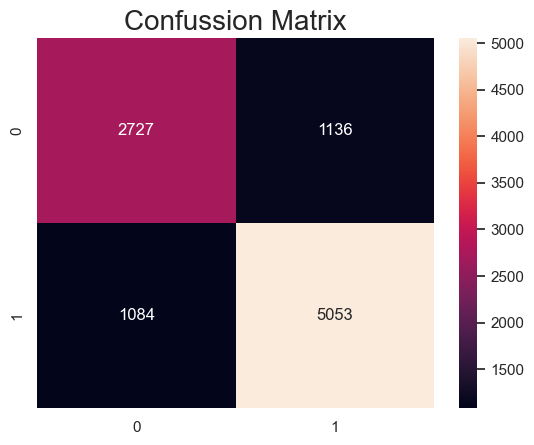

In [162]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 

## Interpretación

### Clase 0 (No Enrolled):
- Verdaderos Negativos (TN): 2727
El modelo predijo correctamente que 2727 usuarios no se inscribieron.
- Falsos Positivos (FP): 1136
El modelo predijo incorrectamente que 1136 usuarios se inscribieron cuando en realidad no lo hicieron.

### Clase 1 (Enrolled):
- Verdaderos Positivos (TP): 5053
El modelo predijo correctamente que 5053 usuarios se inscribieron.
- Falsos Negativos (FN): 1084
El modelo predijo incorrectamente que 1084 usuarios no se inscribieron cuando en realidad sí lo hicieron.

## Conclusiones

### Alta Precisión para la Clase 1:

El modelo muestra una alta capacidad para identificar correctamente a los usuarios que se inscribieron (5053 verdaderos positivos), lo que es crucial para maximizar la efectividad de la campaña de marketing dirigida.

### Errores en la Clase 0:

Aunque el modelo identifica correctamente a muchos usuarios que no se inscribieron (2727 verdaderos negativos), hay un número considerable de falsos positivos (1136), lo que podría resultar en ofrecer promociones innecesarias a usuarios que no están interesados en inscribirse.

### Equilibrio entre Recall y Precisión:

El modelo tiene un buen equilibrio entre recall y precisión para ambas clases, aunque hay margen de mejora, especialmente en la reducción de falsos positivos y falsos negativos.

## Validación cruzada del modelo ML
En esta sección, vamos a realizar la validación cruzada para evaluar si nuestro modelo de machine learning está sobreajustado, insuficientemente ajustado o generalizado correctamente,la validación cruzada nos permite evaluar la estabilidad y robustez del modelo, dividiendo los datos en múltiples subconjuntos y entrenando y evaluando el modelo varias veces.Esto nos ayuda a detectar problemas como el sobreajuste (overfitting) o el subajuste (underfitting) y asegurar que el modelo generaliza bien a datos no vistos.


In [181]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Mejor modelo de XGBoost encontrado 
best_xgb_model = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss',
    n_estimators=200, 
    max_depth=7, 
    learning_rate=0.1,
    subsample=0.8, 
    colsample_bytree=0.8, 
    gamma=0.1
)

# Ajustar el modelo con el conjunto de entrenamiento balanceado
best_xgb_model.fit(X_train_balanced, y_train_balanced)

# Definir la validación cruzada con 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
cv_scores = cross_val_score(best_xgb_model, X_train_balanced, y_train_balanced, cv=cv, scoring='accuracy', n_jobs=-1)

# Imprimir los resultados de la validación cruzada
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation score: {cv_scores.std()}")

Cross-validation scores: [0.82596491 0.82486216 0.81794486 0.81944862 0.8230399 ]
Mean cross-validation score: 0.8222520910256392
Standard deviation of cross-validation score: 0.0030864150128659257


### Puntuaciones de Validación Cruzada:

**Las puntuaciones de validación cruzada** muestran la precisión del modelo en cada uno de los 5 folds. Todas las puntuaciones están por encima de 0.81, lo que indica un rendimiento consistente en cada subdivisión del conjunto de datos.

### Media de la Puntuación de Validación Cruzada:

**La media de la puntuación de validación cruzada** es aproximadamente 0.8223. Esto sugiere que, en promedio, el modelo XGBoost tiene una precisión del 82.23% en conjuntos de datos no vistos.

### Desviación Estándar de la Puntuación de Validación Cruzada:

**La desviación estándar** es aproximadamente 0.0031. Una desviación estándar baja indica que las puntuaciones de validación cruzada son muy consistentes entre los diferentes folds, lo que sugiere que el modelo es estable y no presenta una gran variabilidad en su rendimiento.

## Conclusión
El modelo XGBoost optimizado presenta un buen rendimiento con una precisión promedio del 82.23% y una baja variabilidad entre los diferentes folds de la validación cruzada. Esto sugiere que el modelo generaliza bien a datos no vistos, mostrando estabilidad y robustez en sus predicciones. No se observan signos de sobreajuste o subajuste significativos, lo que indica que el modelo está bien ajustado a los datos.

---
## Mapear la Salida Prevista al Objetivo Real

In [172]:
# Crear un DataFrame con las predicciones y los valores reales
results= pd.DataFrame({
    'Real': y_test,
    'Predicted': y_pred_xgb
    })

In [176]:
print(results.head(50))

       Real  Predicted
33553     1          0
9427      1          0
199       1          0
12447     1          1
39489     1          1
42724     0          0
10822     0          0
49498     1          1
4144      1          1
36958     0          1
43106     1          1
38695     1          1
6188      0          0
1414      0          0
18471     0          0
29282     1          1
15177     0          0
34304     0          1
12609     1          0
12144     1          1
6113      1          1
15908     1          1
821       1          1
15118     1          1
13466     1          1
26497     0          0
42111     1          1
30188     1          1
37237     1          1
33109     0          0
36480     0          0
24148     1          1
5503      1          1
3918      1          1
38478     1          0
21123     1          1
49717     1          1
42294     1          0
47609     1          1
11076     1          1
41514     0          0
22062     1          1
9413      0

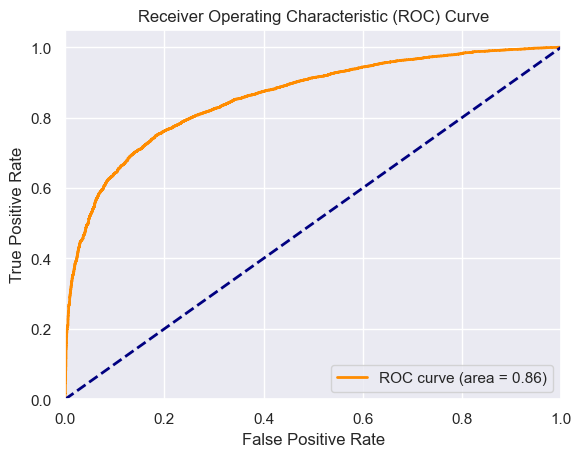

ROC AUC: 0.8580506934782893


In [182]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de las predicciones
y_pred_prob = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC AUC: {roc_auc}")


**El modelo XGBoost** que has entrenado y evaluado muestra un buen rendimiento con un AUC de 0.86. Esto indica que el modelo es capaz de discriminar correctamente entre las clases positivas y negativas en la mayoría de los casos. La curva ROC por encima de la línea diagonal también respalda la capacidad del modelo para realizar predicciones útiles y confiables.

Este análisis sugiere que el modelo es eficaz para la tarea de clasificación que se le ha asignado y que puede ser utilizado con confianza en aplicaciones prácticas para predecir si un usuario se inscribirá (enrolled).

# Importancia de Características
En esta sección, vamos a evaluar la importancia de las características utilizadas por el modelo de XGBoost, la importancia de características nos permite entender cuáles son las variables más influyentes en la predicción de si un usuario se inscribirá o no. Esto puede proporcionar información valiosa para mejorar la aplicación y dirigir los esfuerzos de marketing de manera más efectiva.


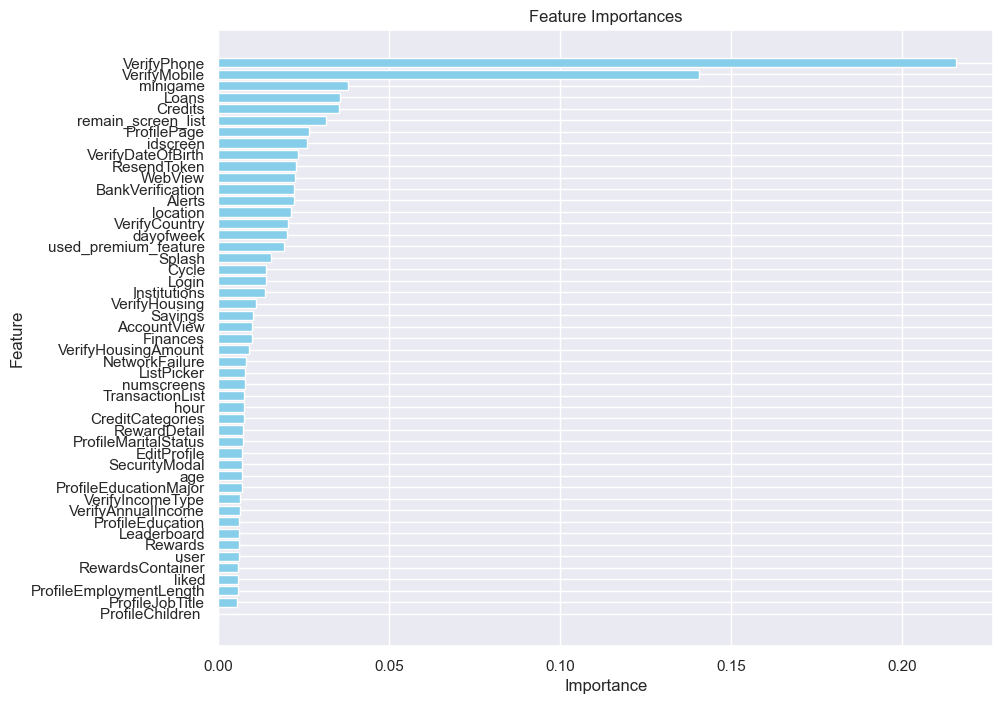

                    Feature  Importance
10              VerifyPhone    0.215953
23             VerifyMobile    0.140800
5                  minigame    0.038085
47                    Loans    0.035491
45                  Credits    0.035420
48       remain_screen_list    0.031611
13              ProfilePage    0.026447
16                 idscreen    0.026028
12        VerifyDateOfBirth    0.023389
40              ResendToken    0.022623
38                  WebView    0.022597
11         BankVerification    0.022303
21                   Alerts    0.022232
8                  location    0.021205
14            VerifyCountry    0.020402
1                 dayofweek    0.020157
6      used_premium_feature    0.019107
17                   Splash    0.015527
15                    Cycle    0.014097
36                    Login    0.014049
9              Institutions    0.013782
24            VerifyHousing    0.011124
44                  Savings    0.010259
32              AccountView    0.009931


In [184]:
# Obtener la importancia de las características
importances = best_xgb_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotear las importancias
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Mostrar el DataFrame de importancias
print(importance_df)

## Características Más Importantes:

**VerifyPhone (21.6%)**: La característica más influyente es la verificación del teléfono. Esto sugiere que los usuarios que completan la verificación de su teléfono tienen una mayor probabilidad de inscribirse en la aplicación.
**VerifyMobile (14.1%)**: La verificación del móvil también es una característica muy influyente. Similar a la verificación del teléfono, esto indica que completar la verificación del móvil es un fuerte indicador de inscripción.
**Minigame (3.8%)**: Participar en minijuegos dentro de la aplicación también muestra una influencia significativa, lo que puede sugerir un mayor compromiso con la aplicación.
**Loans (3.5%) y Credits (3.5%)**: Las características relacionadas con préstamos y créditos son importantes, indicando que los usuarios interesados en estas funciones tienen una mayor probabilidad de inscribirse.

## Características Moderadamente Importantes:

**remain_screen_list (3.2%):** El número de pantallas restantes vistas por el usuario es un indicador moderado de inscripción, sugiriendo que la interacción con más pantallas podría estar correlacionada con la inscripción.
**ProfilePage (2.6%) y idscreen (2.6%)**: La página de perfil y las identificaciones de pantalla también tienen una influencia moderada, lo que indica que la navegación por estas secciones puede ser relevante para la inscripción.

## Características Menos Importantes:

Varias características como **location, dayofweek, y used_premium_feature** tienen menor influencia individualmente, pero podrían contribuir colectivamente a la precisión del modelo.
Características como **ProfileChildren (0%)** no muestran influencia en la predicción de la inscripción.

## Implicaciones
**Verificación de Teléfono y Móvil:** Las características más influyentes están relacionadas con la verificación del teléfono y el móvil. Esto podría implicar que la seguridad y la autenticidad son factores cruciales para la inscripción. Las estrategias de marketing podrían enfocarse en simplificar y resaltar la importancia de completar estas verificaciones.

**Engagement con la Aplicación:** Participar en minijuegos y navegar por varias pantallas son indicadores de mayor compromiso. Fomentar estas actividades dentro de la aplicación podría aumentar las tasas de inscripción.

**Características Financieras:** El interés en préstamos y créditos es un fuerte indicador de inscripción. Promocionar estas características y facilitar su acceso podría mejorar la inscripción de usuarios interesados en servicios financieros específicos.


## En resumen: 
Las características más influyentes identificadas por el modelo proporcionan información valiosa que puede ser utilizada para optimizar la aplicación y las estrategias de marketing, con el objetivo de aumentar las tasas de inscripción y mejorar la experiencia del usuario.